# Lead Scoring Assignment

In [5]:
#Importing Required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
import warnings 
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the data

In [7]:
lead = pd.read_csv('leads.csv')

In [8]:
#Checking the head
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
#Checking the type of each columns
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
#Checking the dimensions
lead.shape

(9240, 37)

In [11]:
#Checking the summary 
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step 2: Data Cleaning and Preparation

In [12]:
#Checking for the percentage of null values
lead.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Do Not Email                                        0
Do Not Call                 

#### Dropping the columns have null values more than 3000

In [13]:
#Dropping columns having missing values greater than 3000
for c in lead.columns:
    if lead[c].isnull().sum()>3000:
        lead.drop(c,1,inplace=True)

In [14]:
#Dropping City and Country since it is not required in model building
lead.drop(columns=['City','Country'],inplace=True)

In [15]:
lead.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Number                                         0
Lead Origin                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
Total Time Spent on Website                         0
Last Notable Activity                               0
A free copy of Mastering The Interview              0
Search                                              0
Magazine                    

In [16]:
#Checking the character value counts for all columns
for c in lead:
    print(lead[c].astype('category').value_counts())
    print('\n\n=======================================================\n\n')

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64




660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64




Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64




Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Refere

Dropping the columns having <b>'select'</b> and  the value counts of these are more than 50% in columns <b>'How did you hear about X Education'</b> and <b>'Lead Profile'</b> as they are of no use as no options were choosen by more than 50% of the people So dropping those columns

In [17]:
# Dropping the columns with 'select' and these the value counts of these are more than 50% as they are of no use. So dropping those columns
lead.drop(columns = ['How did you hear about X Education','Lead Profile'], inplace =True)

- We Notice that few columns have value counts of only one value present for all data points. 
- The columns are  <b>'Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','What matters most to you in choosing a course'.</b> So its best to drop all these columns

In [18]:
lead.drop(columns = ['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums',
                    'Newspaper','Digital Advertisement','Through Recommendations',
                     'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
                    'I agree to pay the amount through cheque','What matters most to you in choosing a course'],inplace = True)

In [19]:
lead.isnull().sum().sort_values(ascending = False)

What is your current occupation           2690
Specialization                            1438
Page Views Per Visit                       137
TotalVisits                                137
Last Activity                              103
Lead Source                                 36
Last Notable Activity                        0
A free copy of Mastering The Interview       0
Total Time Spent on Website                  0
Converted                                    0
Do Not Email                                 0
Lead Origin                                  0
Lead Number                                  0
Prospect ID                                  0
dtype: int64

Since 'What is you current occupation' has more null values we drop the null rows 

In [20]:
lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [21]:
# Drop the column What is your current occupation
lead = lead[~(lead['What is your current occupation'].isna())]

In [22]:
# Check the Null values
lead.isna().sum().sort_values(ascending =False)

Page Views Per Visit                      130
TotalVisits                               130
Last Activity                             103
Lead Source                                36
Specialization                             18
Last Notable Activity                       0
A free copy of Mastering The Interview      0
What is your current occupation             0
Total Time Spent on Website                 0
Converted                                   0
Do Not Email                                0
Lead Origin                                 0
Lead Number                                 0
Prospect ID                                 0
dtype: int64

In [23]:
# Drop only the null values from Total visits
lead = lead[~(lead['TotalVisits'].isna())]

In [24]:
# Check the Null values
lead.isnull().sum().sort_values(ascending = False)

Lead Source                               29
Specialization                            18
Last Notable Activity                      0
A free copy of Mastering The Interview     0
What is your current occupation            0
Last Activity                              0
Page Views Per Visit                       0
Total Time Spent on Website                0
TotalVisits                                0
Converted                                  0
Do Not Email                               0
Lead Origin                                0
Lead Number                                0
Prospect ID                                0
dtype: int64

In [25]:
# Drop Prospect ID and Lead Number as they can not be used for model building
lead.drop(columns = ['Prospect ID','Lead Number'], inplace = True)

In [26]:
lead.isna().sum()

Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [27]:
# Drop only the null values from Lead Source
lead = lead[~(lead['Lead Source'].isna())]

In [28]:
lead.isna().sum()

Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [29]:
# Drop only the null values from Specialization
lead = lead[~(lead['Specialization'].isna())]

In [30]:
# Check the Null values
lead.isna().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

#### Now Data do not have any null values

In [31]:
#Check the shape and rows reatined
print(lead.shape)
print(len(lead.index))
print(len(lead.index)/9240)

(6373, 12)
6373
0.6897186147186147


#### We have retained 68% of the dataset for model building

In [32]:
lead.head(5)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


## Step 3: Data Visualization

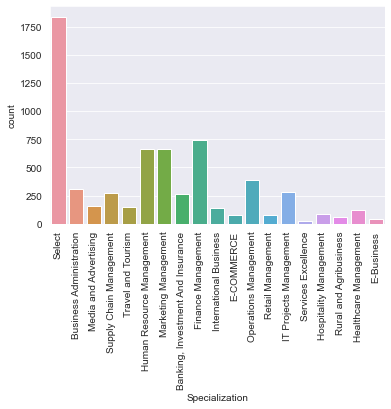

In [33]:
#Plotting the coutnplot for specialization column to check which is most preferred specialization 
sns.set_style('darkgrid')
sns.countplot(lead.Specialization)
plt.xticks(rotation='90')
plt.show()

- The graph shows that the majority people have not selected any specialization during the search however Finance, HR, Marketing are the chosen among others

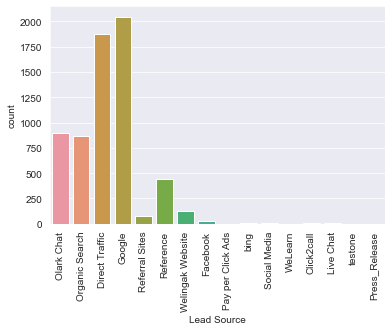

In [34]:
sns.countplot(lead['Lead Source'])
plt.xticks(rotation='90')
plt.show()

- The graph shows that majority leads are generated from Google search and Direct Traffic

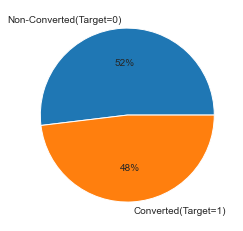

In [35]:
plt.pie(lead.Converted.value_counts(normalize=True),labels=['Non-Converted(Target=0)','Converted(Target=1)'],autopct='%1.f%%')
plt.show()

- The pie chart shows that Non-converted leads are more i.e 52% while converted are 48%

In [36]:
#Checking the converted value counts
lead.Converted.value_counts()

0    3308
1    3065
Name: Converted, dtype: int64

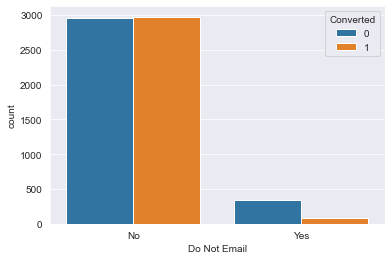

In [37]:
#Countplot for Email received and number of people converted
sns.countplot(lead['Do Not Email'], hue=lead.Converted)
plt.show()

- Countplot shows that people who have responded for do not email have similar rate of converting or not, while who have responded for email show that not-converted are more

## Step 4: Data Preparation

### Creating Dummy Varaiables    

In [38]:
lead.shape

(6373, 12)

In [39]:
#Checking the value counts for all category columns
for c in lead:
    print(lead[c].astype('category').value_counts())
    print('\n\n=======================================================\n\n')

Landing Page Submission    3625
API                        2140
Lead Add Form               581
Lead Import                  27
Name: Lead Origin, dtype: int64




Google               2048
Direct Traffic       1873
Olark Chat            892
Organic Search        870
Reference             443
Welingak Website      129
Referral Sites         75
Facebook               28
Click2call              4
bing                    3
Social Media            2
Live Chat               2
testone                 1
WeLearn                 1
Press_Release           1
Pay per Click Ads       1
Name: Lead Source, dtype: int64




No     5938
Yes     435
Name: Do Not Email, dtype: int64




0    3308
1    3065
Name: Converted, dtype: int64




0.0      1347
2.0      1225
3.0       937
4.0       823
5.0       578
6.0       337
1.0       260
7.0       225
8.0       162
9.0       128
10.0       76
11.0       70
13.0       39
12.0       31
14.0       28
16.0       16
15.0       14
17.0       12
18.0       12
20.

In [40]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [41]:
# 1. Create dummy Variables for Lead Origin
lead_origin = pd.get_dummies(lead['Lead Origin'],drop_first = True, prefix = 'Lead Origin')

In [42]:
lead_origin

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,0,0,0
1,0,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
9234,1,0,0
9235,1,0,0
9236,1,0,0
9237,1,0,0


In [43]:
# 2. Create dummy Variables for Lead Source
lead_source = pd.get_dummies(lead['Lead Source'],drop_first = True,prefix = 'Lead Source' )

In [44]:
lead_source

,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9235,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9236,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9237,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
# 3. Converting for Do Not Email
do_not_email1 = pd.get_dummies(lead['Do Not Email'], prefix='Do Not Email',drop_first = True)

In [46]:
do_not_email1

,Do Not Email_Yes
0,0
1,0
2,0
3,0
4,0
...,...
9234,0
9235,1
9236,0
9237,1


In [47]:
# 4. Create dummy Variables for Last Activity
last_activity = pd.get_dummies(lead['Last Activity'],drop_first = True, prefix = 'Last Activity')

In [48]:
last_activity.head(5)

,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
# 5. Create dummy Variables for Specialisation
specialisation = pd.get_dummies(lead['Specialization'], prefix='Specialization')
specialisation1 = specialisation.drop(['Specialization_Select'],1)

In [50]:
specialisation1.head()

,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
# 6. Create dummy Variables for 'What is your current occupation'
occupation = pd.get_dummies(lead['What is your current occupation'], drop_first = True, prefix = 'What is your current occupation')

In [52]:
occupation.head(5)

,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [53]:
# 7. Converting 'A free copy of Mastering The Interview'
free_interview = pd.get_dummies(lead['A free copy of Mastering The Interview'], prefix='A free copy of Mastering The Interview',drop_first = True)

In [54]:
free_interview.head()

,A free copy of Mastering The Interview_Yes
0,0
1,0
2,1
3,0
4,0


In [55]:
# 8. Create dummy Variables for 'Last Notable Activity'
activity = pd.get_dummies(lead['Last Notable Activity'],drop_first = True, prefix = 'Last Notable Activity')

In [56]:
activity.head()

,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0


## Step 5: Merging the Dataframe

In [57]:
#Merging the dataframe
lead = pd.concat([lead,lead_origin,lead_source,last_activity,specialisation1,occupation,activity,do_not_email1,free_interview],axis = 1)

In [58]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email_Yes,A free copy of Mastering The Interview_Yes
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,...,0,1,0,0,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,1,0,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,...,0,1,0,0,0,0,0,0,0,0


In [59]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing',
       'Lead Source_testone', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam

In [60]:
lead.shape

(6373, 83)

#### Dropping the repeated variables          

In [61]:
# We have created dummies for the below variables, so we can drop them
lead.drop(columns = ['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation',
           'Last Notable Activity','Do Not Email','A free copy of Mastering The Interview'], inplace =True)

In [62]:
lead.shape

(6373, 75)

In [63]:
lead.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_testone',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat 

## Step 6: Splitting the Data into Training and Testing Sets

In [64]:
# Putting feature variable to X
X = lead.drop(['Converted'], axis = 1)

# Putting response variable to y
y = lead['Converted']

In [65]:
#Splitting the dataframe into train and test as 70% and 30% respectively
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [66]:
print(X_train.shape)
print(X_test.shape)

(4461, 74)
(1912, 74)


## Step 7: Feature Scaling

In [67]:
#We have scaled using MinMax scaler
scaler = MinMaxScaler()

In [68]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email_Yes,A free copy of Mastering The Interview_Yes
8003,4.0,67,2.0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
218,4.0,187,4.0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4171,6.0,78,6.0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4037,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,0.0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [69]:
#Apply scaler() to all the columns except the dummy variables
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [70]:
#Checking for Rescalling
X_train.head(5)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email_Yes,A free copy of Mastering The Interview_Yes
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [71]:
# Checking for Correlation
X_train.corr()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email_Yes,A free copy of Mastering The Interview_Yes
TotalVisits,1.000000,0.180396,0.435633,0.253439,-0.201371,-0.040149,0.069662,-0.040149,0.079346,-0.014172,...,0.034390,-0.081202,0.004655,0.229616,-0.028839,0.001828,-0.003664,0.011963,0.025073,0.183848
Total Time Spent on Website,0.180396,1.000000,0.317382,0.271853,-0.254398,-0.056578,0.112708,-0.056578,0.232249,-0.019972,...,0.013342,-0.108489,0.003542,0.033766,0.084013,0.009814,0.006604,-0.011761,-0.051399,0.141123
Page Views Per Visit,0.435633,0.317382,1.000000,0.481898,-0.367005,-0.072056,0.103034,-0.072056,0.206739,-0.025436,...,0.027387,-0.076662,-0.043928,0.016484,0.029539,0.023689,0.022487,0.001554,0.025115,0.258355
Lead Origin_Landing Page Submission,0.253439,0.271853,0.481898,1.000000,-0.367172,-0.068330,0.504456,-0.068330,0.077192,-0.024120,...,0.012938,-0.047642,-0.092707,0.056840,0.011676,-0.000263,0.021311,-0.017054,0.089170,0.552876
Lead Origin_Lead Add Form,-0.201371,-0.254398,-0.367005,-0.367172,1.000000,-0.019342,-0.206074,-0.019342,-0.219566,0.065693,...,-0.015281,-0.056909,-0.013008,-0.017898,0.101182,0.006338,-0.023711,-0.004827,-0.032590,-0.212178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Last Notable Activity_Unreachable,0.001828,0.009814,0.023689,-0.000263,0.006338,-0.003600,-0.013561,-0.003600,0.015097,-0.001271,...,-0.002844,-0.039753,-0.006452,-0.011230,-0.038225,1.000000,-0.004413,-0.000898,-0.016253,-0.011086
Last Notable Activity_Unsubscribed,-0.003664,0.006604,0.022487,0.021311,-0.023711,-0.004413,0.000259,-0.004413,-0.004484,-0.001558,...,-0.003486,-0.048731,-0.007909,-0.013766,-0.046858,-0.004413,1.000000,-0.001101,0.271487,0.025298
Last Notable Activity_View in browser link Clicked,0.011963,-0.011761,0.001554,-0.017054,-0.004827,-0.000898,-0.009571,-0.000898,0.021823,-0.000317,...,-0.000710,-0.009922,-0.001610,-0.002803,-0.009540,-0.000898,-0.001101,1.000000,-0.004056,0.020985
Do Not Email_Yes,0.025073,-0.051399,0.025115,0.089170,-0.032590,-0.016253,0.094985,-0.016253,-0.064034,-0.005737,...,-0.012841,0.080918,-0.020778,0.057348,-0.004039,-0.016253,0.271487,-0.004056,1.000000,0.060307


## Step 8: Model Building

In [72]:
logreg = LogisticRegression()

In [73]:
# Running RFE with the output number of the variable equal to 15
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train,y_train)

In [74]:
# Checking which parameters have been selected in that list of 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 57),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 33),
 ('Lead Source_testone', False, 38),
 ('Last Activity_Converted to Lead', False, 25),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link Clicked', False, 49),
 ('Last Act

In [75]:
# storing the selected 15 variables in col list
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable', 'Do Not Email_Yes'],
      dtype='object')

In [76]:
# checking which columns have been eleminated 
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_testone', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       '

##### Assessing the model with StatsModels

### Model 1

In [77]:
# Creating X_train dataframe with RFE selected variables
X_train = X_train[col]

In [78]:
#Adding the constant
X_train_sm = sm.add_constant(X_train)

#Created a fitted model
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()

#Checked the summary for the model obtained
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Wed, 08 Sep 2021   Deviance:                       4145.5
Time:                        21:28:47   Pearson chi2:                 4.84e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Few Variables have a high p- value. So we will check up with VIF

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.19
4,Lead Source_Reference,65.18
5,Lead Source_Welingak Website,20.03
10,What is your current occupation_Unemployed,3.65
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56


By looking at VIF and p-value we can see `'Lead Source_Reference'` have High VIF and High p-value so we will drop this variable

### Model 2

In [80]:
# Creating X_train2 dataframe with dropping Lead Source_Reference variable
X_train_2 = X_train.drop(['Lead Source_Reference'], axis = 1)

In [81]:
#Adding the constant
X_train_sm2 = sm.add_constant(X_train_2)

#Created a fitted model
logm2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial())
res = logm2.fit()

#Checked the summary for the model obtained
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Wed, 08 Sep 2021   Deviance:                       4146.5
Time:                        21:28:47   Pearson chi2:                 4.82e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,3.65
5,Last Activity_Had a Phone Conversation,2.44
11,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
2,Lead Origin_Lead Add Form,1.71
0,TotalVisits,1.62
6,Last Activity_SMS Sent,1.59
10,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33


We can notice that the VIF is controlled `'Last Notable Activity_Had a Phone Conversation'` has high p-value so we will drop this variable

### Model 3

In [83]:
# Creating X_train3 dataframe with dropping Last Notable Activity_Had a Phone Conversation variable
X_train_3 = X_train_2.drop(['Last Notable Activity_Had a Phone Conversation'], axis = 1)

In [84]:
#Adding the constant
X_train_sm3 = sm.add_constant(X_train_3)

#Created a fitted model
logm3 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial())
res = logm3.fit()

#Checked the summary for the model obtained
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Wed, 08 Sep 2021   Deviance:                       4152.2
Time:                        21:28:47   Pearson chi2:                 4.82e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,3.65
1,Total Time Spent on Website,2.38
2,Lead Origin_Lead Add Form,1.71
0,TotalVisits,1.62
6,Last Activity_SMS Sent,1.59
10,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33
8,What is your current occupation_Student,1.09
12,Do Not Email_Yes,1.09


We can notice that the VIF is low for `'What is your current occupation_Housewife'` but has a high p-value so we will drop this variable

### Model 4

In [86]:
# Creating X_train4 dataframe with dropping What is your current occupation_Housewife variable
X_train_4 = X_train_3.drop(['What is your current occupation_Housewife'], axis = 1)

In [87]:
#Adding the constant
X_train_sm4 = sm.add_constant(X_train_4)

#Created a fitted model
logm4 = sm.GLM(y_train,X_train_sm4, family = sm.families.Binomial())
res = logm4.fit()

#Checked the summary for the model obtained
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Wed, 08 Sep 2021   Deviance:                       4156.7
Time:                        21:28:47   Pearson chi2:                 4.83e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

The p-value is still high for `'What is your current occupation_Working Professional'` so we will drop this variable

### Model 5

In [88]:
# Creating X_train4 dataframe with dropping What is your current occupation_Working Professional variable
X_train_5 = X_train_4.drop(['What is your current occupation_Working Professional'], axis = 1)

In [89]:
#Adding the constant
X_train_sm5 = sm.add_constant(X_train_5)

#Created a fitted model
logm5 = sm.GLM(y_train,X_train_sm5, family = sm.families.Binomial())
res = logm5.fit()

#Checked the summary for the model obtained
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Wed, 08 Sep 2021   Deviance:                       4158.1
Time:                        21:28:48   Pearson chi2:                 4.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [90]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_5.values, i) for i in range(X_train_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation_Unemployed,2.82
1,Total Time Spent on Website,2.00
0,TotalVisits,1.54
6,Last Activity_SMS Sent,1.51
2,Lead Origin_Lead Add Form,1.45
3,Lead Source_Olark Chat,1.33
4,Lead Source_Welingak Website,1.30
10,Do Not Email_Yes,1.08
7,What is your current occupation_Student,1.06
5,Last Activity_Had a Phone Conversation,1.01


Now we can observe both p-value and VIF are controlled. This means that the final model is obtained

### Model Evaluation

In [91]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm5)
y_train_pred[:10]

8003    0.300117
218     0.142002
4171    0.127629
4037    0.291558
3660    0.954795
207     0.194426
2044    0.178073
6411    0.949460
6498    0.075995
2085    0.982316
dtype: float64

In [92]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30011695, 0.14200165, 0.12762885, 0.29155814, 0.95479546,
       0.19442563, 0.17807328, 0.94946006, 0.07599465, 0.98231619])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [93]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.300117
1,0,0.142002
2,1,0.127629
3,1,0.291558
4,1,0.954795


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [94]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted
0,0,0.300117,0
1,0,0.142002,0
2,1,0.127629,0
3,1,0.291558,0
4,1,0.954795,1


In [95]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1929  383]
 [ 560 1589]]


In [96]:
 # Predicted     not_converted    converted
 # not_converted     1929            283
 # converted         560            1589  

In [97]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7886124187401928


The accuracy of the model is <b> 78.86% </b> which suggests that the model built is a good one

## Metrics beyond simply accuracy

In [98]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [99]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.739413680781759

In [100]:
# Let us calculate specificity
TN / float(TN+FP)

0.8343425605536332

## Step 9: Plotting the ROC Curve

In [101]:
### Step 9: Plotting the ROC Curvedef draw_roc( actual, probs ):
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [102]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

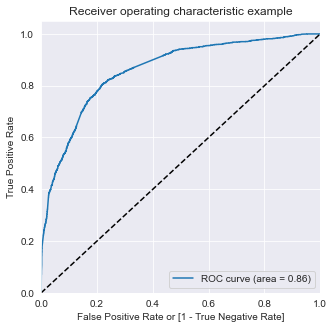

In [103]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

- The ROC Curve shows that we are getting a good value of 0.86 indicating that it is a good predictive model.

## Step 10: Finding Optimal Cutoff Point

In [104]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1


In [105]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.527012  0.994416  0.092561
0.2   0.2  0.698274  0.944160  0.469723
0.3   0.3  0.767541  0.865984  0.676038
0.4   0.4  0.791975  0.810610  0.774654
0.5   0.5  0.788612  0.739414  0.834343
0.6   0.6  0.757229  0.624011  0.881055
0.7   0.7  0.735037  0.543509  0.913062
0.8   0.8  0.711500  0.453234  0.951557
0.9   0.9  0.644026  0.279665  0.982699


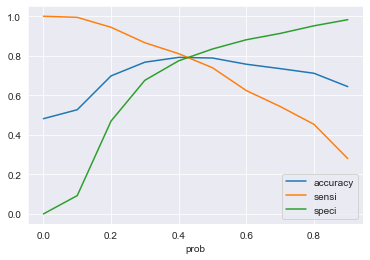

In [106]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.43 is the optimum point to take it as a cutoff probability.

In [107]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.43 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1


In [108]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7895090786819099

Now the overall accuracy we are getting is <b>78.95%</b>

In [109]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1834,  478],
       [ 461, 1688]], dtype=int64)

In [110]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [111]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7854816193578409

In [112]:
# Let us calculate specificity
TN / float(TN+FP)

0.7932525951557093

## Step 11: Making predictions on the test set

In [113]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [114]:
column = X_train_5.columns
X_test = X_test[column]
X_test

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Unreachable,Do Not Email_Yes
4771,0.000000,0.000000,1,0,0,0,1,0,0,0,0
6122,0.027888,0.029049,0,0,0,0,0,0,1,0,0
9202,0.015936,0.416813,0,0,0,0,1,0,1,0,0
6570,0.011952,0.378961,0,0,0,0,1,0,1,0,1
2668,0.031873,0.395246,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5828,0.011952,0.027289,0,0,0,0,1,0,1,0,0
6583,0.011952,0.152289,0,0,0,0,1,0,1,0,0
5531,0.055777,0.702025,0,0,0,0,0,0,1,0,0
3056,0.011952,0.417694,0,0,0,0,1,0,1,0,1


In [115]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [116]:
y_test_pred = res.predict(X_test_sm)

In [117]:
y_test_pred[:10]

4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
4233    0.792250
3368    0.704038
9091    0.464521
5972    0.282978
3631    0.786460
dtype: float64

In [118]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [119]:
# Let's see the head
y_pred_1.head()

,0
4771,0.996296
6122,0.129992
9202,0.703937
6570,0.299564
2668,0.720796


In [120]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [121]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [122]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [123]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [124]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4771,0.996296
1,0,6122,0.129992
2,0,9202,0.703937
3,1,6570,0.299564
4,1,2668,0.720796


In [125]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [126]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

In [127]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4771,1,0.996296
1,6122,0,0.129992
2,9202,0,0.703937
3,6570,1,0.299564
4,2668,1,0.720796


In [128]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.43 else 0)

In [129]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4771,1,0.996296,1
1,6122,0,0.129992,0
2,9202,0,0.703937,1
3,6570,1,0.299564,0
4,2668,1,0.720796,1


In [130]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7850418410041841

The overall accuracy is <b>78.5%</b> for the test model which is almost close to the train model. We can tell that the test model is good

In [131]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[791, 205],
       [206, 710]], dtype=int64)

In [132]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [133]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7751091703056768

In [134]:
# Let us calculate specificity
TN / float(TN+FP)

0.7941767068273092

### Final Observation:
#### Let us compare the values obtained for Train & Test:

#### Train Data:
Accuracy : 78.86%<br>
Sensitivity : 73.94%<br>
Specificity : 83.43%

#### Test Data:
Accuracy : 78.55%<br>
Sensitivity : 77.51%<br>
Specificity : 79.51%

Final Observation:
It was found that the variables that mattered the most in the potential buyers are:
1. Total number of visits.
2. The total time spend on the Website.
3. When the lead source was:
a. Google
b. Direct traffic
c. Organic search
d. Welingak website
4. When the last activity was:
a. SMS
b. Olark chat conversation
5. When the lead origin is Lead add form.
6. Whether their current occupation is Student or Unemployed.
Keeping these in mind the X Education can flourish as they have a 